In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, plot_roc_curve

In [ ]:
df_train = pd.read_csv("./train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Engineering from Week 3

In [ ]:
df_train[['female','male']] = pd.get_dummies(df_train['Sex'])
df_train[["C","Q","S"]] = pd.get_dummies(df_train["Embarked"])
df_train.fillna(method="ffill",inplace=True)
drop_features = ["Sex",'Ticket','Name','Cabin',"Embarked"]
df_train.drop(drop_features,inplace=True,axis=1)

In [ ]:
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,0,3,19.0,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [ ]:
## Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(df_train.loc[:,'Pclass':],df_train.Survived,\
                                                          test_size=0.2)

## Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

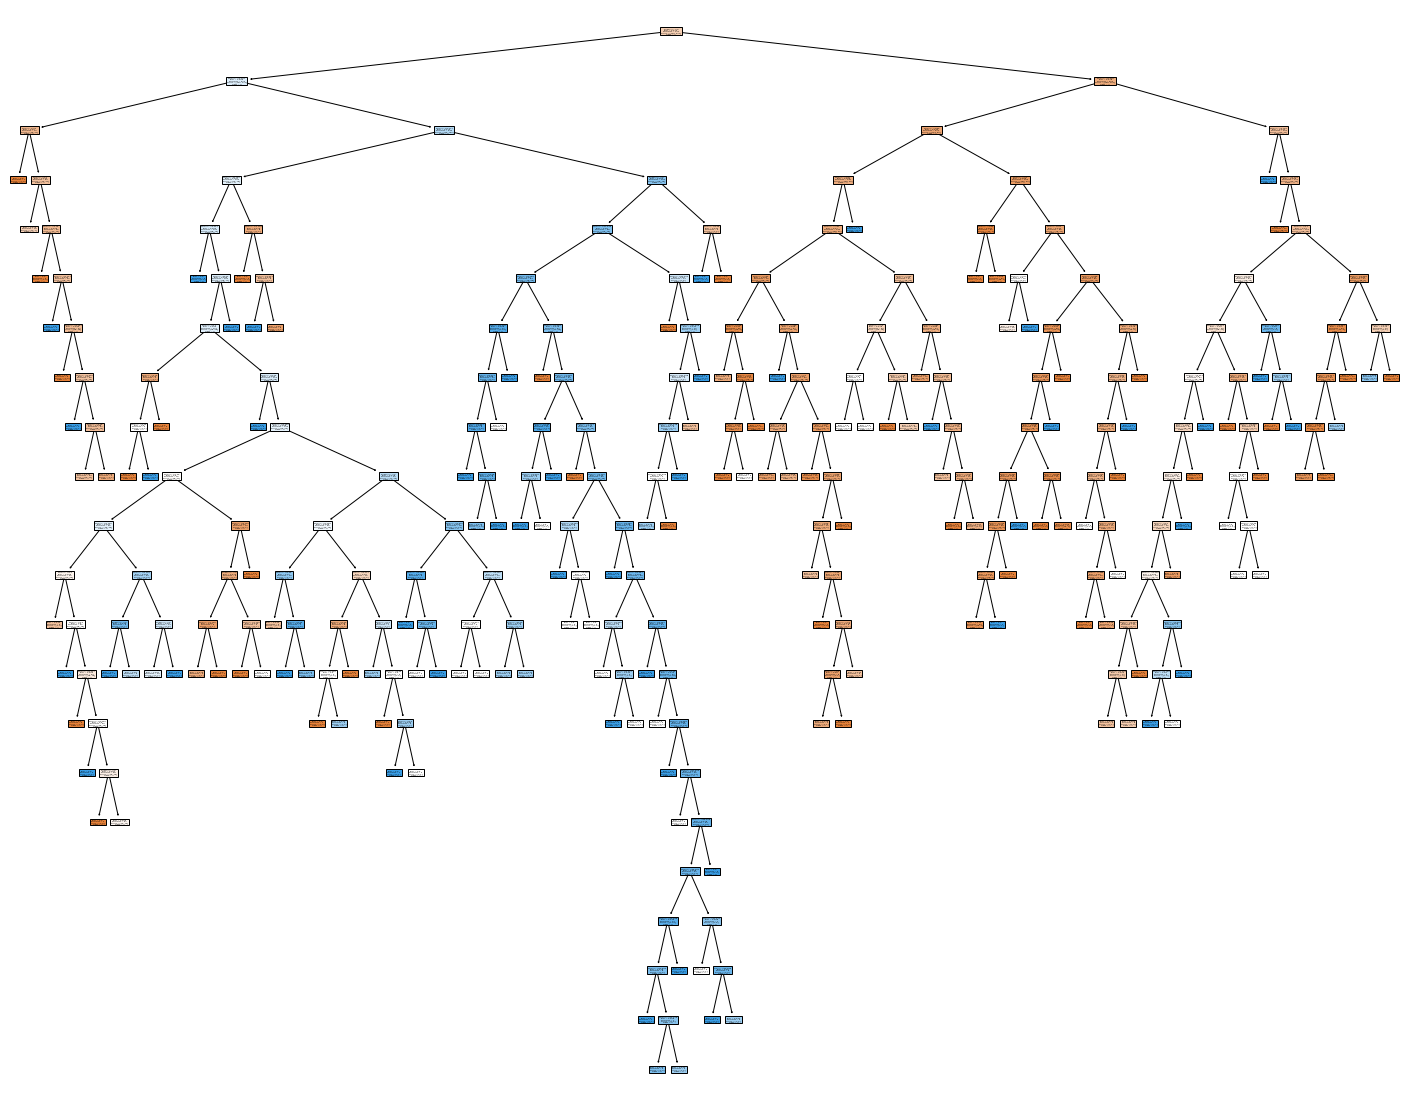

In [ ]:
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(dt_model, 
#                    feature_names=['Pclass','Fare'],  
#                    class_names=['1','0'],
#                    filled=True)


In [ ]:
dt_model_predictions = dt_model.predict(x_test)

In [ ]:
print(classification_report(y_test,dt_model_predictions))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       107
           1       0.74      0.78      0.76        72

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.80      0.80      0.80       179



## Random Forest

In [ ]:
#Pruning is to help overcome overfitting problem
rf_model = RandomForestClassifier(bootstrap=True,criterion='entropy',max_leaf_nodes=10,max_features='sqrt',n_estimators=500)
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_model_predictions = rf_model.predict(x_test)

In [ ]:
print(classification_report(y_test,rf_model_predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       107
           1       0.78      0.71      0.74        72

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
df_test = pd.read_csv("./test.csv")

In [ ]:
df_test[['female','male']] = pd.get_dummies(df_test['Sex'])
df_test[["C","Q","S"]] = pd.get_dummies(df_test["Embarked"])
df_test.fillna(method="ffill",inplace=True)
drop_features = ["Sex",'Ticket','Name','Cabin',"Embarked"]
df_test.drop(drop_features,inplace=True,axis=1)

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [ ]:
submission_predictions = rf_model.predict(df_test.loc[:,'Pclass':])

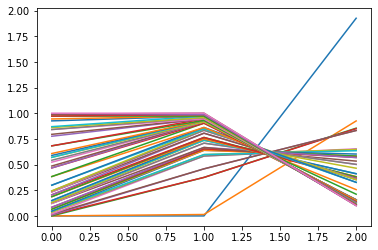

In [ ]:
#R0C-AUC curves
#Precision-Recall Curves
plt.plot(roc_curve(y_test,rf_model.predict_proba(x_test)[:,1]))

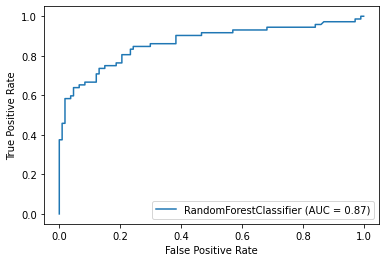

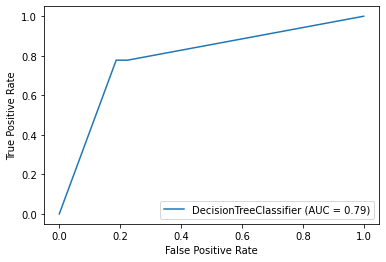

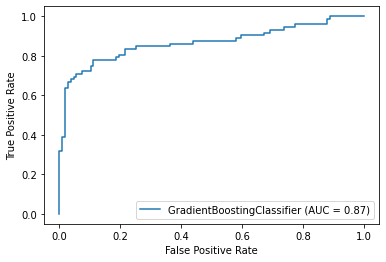

In [ ]:
plot_roc_curve(rf_model,x_test,y_test)
plot_roc_curve(dt_model,x_test,y_test)
plot_roc_curve(gb_model,x_test,y_test)

In [ ]:
#GridSearch CV (Cross Validation)
parameter_grid = {
    'bootstrap': [True, False],
    'criterion': ['gini','entropy'],
    'n_estimators': [10,20,50,100,500],
    'max_leaf_nodes': [2,4,5,7,10],
    'max_features': ['auto','log2','sqrt']
}

In [ ]:
rf_model_gridsearched = GridSearchCV(cv=5,estimator=RandomForestClassifier(),
                                     param_grid = parameter_grid)

In [ ]:
rf_model_gridsearched.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
rf_model_gridsearched.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'max_leaf_nodes': 10,
 'n_estimators': 50}

In [ ]:
print(classification_report(y_test,rf_model_gridsearched.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       107
           1       0.79      0.67      0.72        72

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



## Feature Importances

- This is very helpful in explaining the model predictions

Feature:  Pclass ; Score:  0.07892968333595951
Feature:  Age ; Score:  0.257736339401091
Feature:  SibSp ; Score:  0.04532304273521414
Feature:  Parch ; Score:  0.03680620882248416
Feature:  Fare ; Score:  0.25009664777181384
Feature:  female ; Score:  0.14949849925898462
Feature:  male ; Score:  0.14657270543952675
Feature:  C ; Score:  0.011987495685788108
Feature:  Q ; Score:  0.00801510454949484
Feature:  S ; Score:  0.015034272999643052


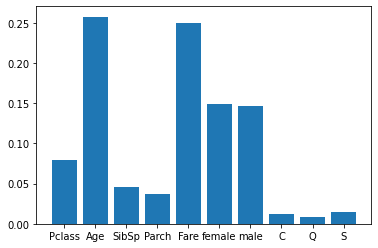

In [ ]:
feature_importance = rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(feature_importance):
	print("Feature: ",df_train.loc[:,'Pclass':].columns[i],"; Score: ",v)
# plot feature importance
plt.bar(df_train.loc[:,'Pclass':].columns, feature_importance)
plt.show()

In [ ]:
## Explore the Gradient Boosting and XGBoosting algorithm predictions yourself

In [ ]:
gb_model = GradientBoostingClassifier(learning_rate=0.5)
gb_model.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gb_model_predictions = gb_model.predict(x_test)

In [ ]:
print(classification_report(y_test,gb_model_predictions))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       107
           1       0.73      0.79      0.76        72

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.80      0.80      0.80       179

